In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.utils import shuffle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer, SimpleImputer

In [2]:
notes = pd.read_csv('notes.csv')
dynamic = pd.read_csv('dynamic.csv')
static = pd.read_csv('static.csv')

s_train_fixID= pd.read_csv('static_train_df.csv')
s_test_fixID= pd.read_csv('static_test_df.csv')
s_holdout_fixID= pd.read_csv('static_holdout_df.csv')

In [3]:
print(s_train_fixID.shape)
print(s_test_fixID.shape)
print(s_holdout_fixID.shape)

(14289, 47)
(4083, 47)
(2042, 47)


In [4]:
trainID= s_train_fixID['id'].astype(str)
testID= s_test_fixID['id'].astype(str)
holdoutID= s_holdout_fixID['id'].astype(str)

# Static Data

In [7]:
static.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20414 entries, 0 to 20413
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   20414 non-null  int64  
 1   hosp_admittime       20414 non-null  object 
 2   hosp_dischtime       20414 non-null  object 
 3   icu_intime           20414 non-null  object 
 4   icu_outtime          20414 non-null  object 
 5   los_icu              20414 non-null  float64
 6   icu_death            20414 non-null  int64  
 7   gender               20414 non-null  object 
 8   race                 20414 non-null  object 
 9   admission_age        20414 non-null  float64
 10  weight_admit         19802 non-null  float64
 11  height               11000 non-null  float64
 12  admission_type       20414 non-null  object 
 13  first_careunit       20414 non-null  object 
 14  charlson_score       20414 non-null  int64  
 15  atrial_fibrillation  20414 non-null 

In [8]:
static.describe()

,id,los_icu,icu_death,admission_age,weight_admit,height,charlson_score,atrial_fibrillation,malignant_cancer,chf,ckd,cld,copd,diabetes,hypertension,ihd,stroke
count,2.041400e+04,20414.000000,20414.000000,20414.000000,19802.000000,11000.000000,20414.000000,20414.000000,20414.000000,20414.000000,20414.000000,20414.000000,20414.000000,20414.000000,20414.000000,20414.000000,20414.000000
mean,2.499426e+07,4.854449,0.104732,67.179316,85.476669,169.445921,5.791026,0.268982,0.128833,0.346527,0.427305,0.112080,0.282012,0.334427,0.719114,0.471980,0.121387
std,2.871874e+06,5.973425,0.306215,15.588895,28.316987,10.813324,2.914619,0.443441,0.335023,0.475875,0.494699,0.315473,0.449990,0.471801,0.449443,0.499226,0.326585
min,2.000130e+07,1.000000,0.000000,18.009528,1.000000,122.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.251658e+07,1.800000,0.000000,57.357844,68.000000,163.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.500958e+07,2.880000,0.000000,68.484516,81.400000,170.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,2.746154e+07,5.280000,0.000000,78.898969,98.300000,178.000000,8.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,2.999962e+07,101.730000,1.000000,100.058421,1010.000000,208.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
static['id'].nunique()

20414

In [10]:
static.head()

,id,hosp_admittime,hosp_dischtime,icu_intime,icu_outtime,los_icu,icu_death,gender,race,admission_age,...,atrial_fibrillation,malignant_cancer,chf,ckd,cld,copd,diabetes,hypertension,ihd,stroke
0,24099382,6/11/11 7:15,6/18/11 21:45,6/11/11 14:31,6/13/11 18:05,2.15,0,M,OTHER,58.441631,...,0,0,0,0,0,1,1,1,0,0
1,27824879,9/30/28 20:55,10/10/28 15:54,9/30/28 20:58,10/5/28 18:39,4.90,0,F,WHITE,79.748598,...,0,0,0,0,0,1,0,1,1,0
2,27146619,9/20/41 0:34,9/22/41 12:05,9/20/41 7:13,9/21/41 18:10,1.46,0,F,WHITE,81.717397,...,0,0,1,1,0,0,0,0,1,0
3,22476441,10/8/73 16:46,10/16/73 13:05,10/8/73 18:28,10/10/73 13:26,1.79,0,F,BLACK/AFRICAN AMERICAN,63.769278,...,0,0,1,1,0,1,1,1,1,0
4,23169158,3/12/27 1:19,3/19/27 13:15,3/12/27 2:43,3/15/27 1:53,2.97,0,F,WHITE,84.191979,...,1,0,1,1,0,0,1,1,0,0


In [ ]:
# one hot encode:


In [9]:
#convert datetime datatype. Convert gender to binary. Convert id dataype to object.

static['hosp_admittime']=pd.to_datetime(static['hosp_admittime'], format= '%m/%d/%y %H:%M')
static['hosp_dischtime']=pd.to_datetime(static['hosp_dischtime'], format= '%m/%d/%y %H:%M')
static['icu_intime']=pd.to_datetime(static['icu_intime'], format= '%m/%d/%y %H:%M')
static['icu_outtime']=pd.to_datetime(static['icu_outtime'], format= '%m/%d/%y %H:%M')

static['gender']= static.apply(lambda row: 1 if row.gender =='M' else 0, axis =1)

static['id'] = static['id'].astype(str)


In [10]:
#drop columns with >50% missing data (none dropped)

drop_thresh50 = static.shape[0]*0.5
static = static.dropna(thresh = drop_thresh50, axis=1)

In [11]:
#normalise data

num_cols = static.columns[static.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
scaler = preprocessing.StandardScaler()
static[num_cols] = scaler.fit_transform(static[num_cols])

In [12]:
#check
static.describe()

,los_icu,icu_death,gender,admission_age,weight_admit,height,charlson_score,atrial_fibrillation,malignant_cancer,chf,ckd,cld,copd,diabetes,hypertension,ihd,stroke
count,2.041400e+04,2.041400e+04,2.041400e+04,2.041400e+04,1.980200e+04,1.100000e+04,2.041400e+04,2.041400e+04,2.041400e+04,2.041400e+04,2.041400e+04,2.041400e+04,2.041400e+04,2.041400e+04,2.041400e+04,2.041400e+04,2.041400e+04
mean,-3.411051e-17,5.151383e-17,1.082486e-16,-9.796329e-16,2.267766e-16,2.033929e-15,1.211271e-16,7.100554e-17,2.088398e-17,4.176797e-17,4.107183e-17,-3.689504e-17,1.531492e-17,-5.186189e-17,6.961328e-19,-9.049726e-18,1.531492e-17
std,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000025e+00,1.000045e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00,1.000024e+00
min,-6.452820e-01,-3.420293e-01,-1.131091e+00,-3.154232e+00,-2.983326e+00,-4.387927e+00,-1.986938e+00,-6.065934e-01,-3.845592e-01,-7.282066e-01,-8.637879e-01,-3.552851e-01,-6.267229e-01,-7.088481e-01,-1.600052e+00,-9.454458e-01,-3.716960e-01
25%,-5.113522e-01,-3.420293e-01,-1.131091e+00,-6.300455e-01,-6.171953e-01,-5.961362e-01,-6.145124e-01,-6.065934e-01,-3.845592e-01,-7.282066e-01,-8.637879e-01,-3.552851e-01,-6.267229e-01,-7.088481e-01,-1.600052e+00,-9.454458e-01,-3.716960e-01
50%,-3.305469e-01,-3.420293e-01,8.841025e-01,8.372828e-02,-1.439691e-01,5.124273e-02,7.170040e-02,-6.065934e-01,-3.845592e-01,-7.282066e-01,-8.637879e-01,-3.552851e-01,-6.267229e-01,-7.088481e-01,6.249796e-01,-9.454458e-01,-3.716960e-01
75%,7.124247e-02,-3.420293e-01,8.841025e-01,7.518134e-01,4.528608e-01,7.911044e-01,7.579132e-01,1.648551e+00,-3.845592e-01,1.373237e+00,1.157692e+00,-3.552851e-01,1.595601e+00,1.410740e+00,6.249796e-01,1.057702e+00,-3.716960e-01
max,1.621815e+01,2.923726e+00,8.841025e-01,2.109188e+00,3.264990e+01,3.565586e+00,4.532084e+00,1.648551e+00,2.600380e+00,1.373237e+00,1.157692e+00,2.814641e+00,1.595601e+00,1.410740e+00,6.249796e-01,1.057702e+00,2.690371e+00


In [13]:
static.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20414 entries, 0 to 20413
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   20414 non-null  object        
 1   hosp_admittime       20414 non-null  datetime64[ns]
 2   hosp_dischtime       20414 non-null  datetime64[ns]
 3   icu_intime           20414 non-null  datetime64[ns]
 4   icu_outtime          20414 non-null  datetime64[ns]
 5   los_icu              20414 non-null  float64       
 6   icu_death            20414 non-null  float64       
 7   gender               20414 non-null  float64       
 8   race                 20414 non-null  object        
 9   admission_age        20414 non-null  float64       
 10  weight_admit         19802 non-null  float64       
 11  height               11000 non-null  float64       
 12  admission_type       20414 non-null  object        
 13  first_careunit       20414 non-

In [5]:
#train, test, holdout sets with fixed ID

s_trainset= static.loc[static['id'].isin(trainID)]
s_testset= static.loc[static['id'].isin(testID)]
s_holdoutset= static.loc[static['id'].isin(holdoutID)]

In [6]:
#check
print(s_trainset.shape)
print(s_testset.shape)
print(s_holdoutset.shape)

(0, 25)
(0, 25)
(0, 25)


In [16]:
s_trainset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14289 entries, 0 to 20413
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   14289 non-null  object        
 1   hosp_admittime       14289 non-null  datetime64[ns]
 2   hosp_dischtime       14289 non-null  datetime64[ns]
 3   icu_intime           14289 non-null  datetime64[ns]
 4   icu_outtime          14289 non-null  datetime64[ns]
 5   los_icu              14289 non-null  float64       
 6   icu_death            14289 non-null  float64       
 7   gender               14289 non-null  float64       
 8   race                 14289 non-null  object        
 9   admission_age        14289 non-null  float64       
 10  weight_admit         13870 non-null  float64       
 11  height               7682 non-null   float64       
 12  admission_type       14289 non-null  object        
 13  first_careunit       14289 non-

<Axes: >

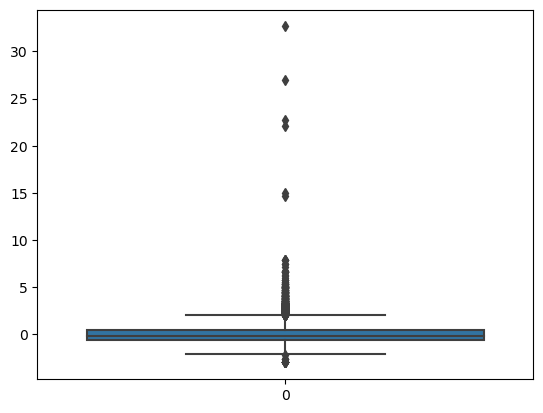

In [17]:
sns.boxplot(static['weight_admit'])

<Axes: xlabel='weight_admit', ylabel='Count'>

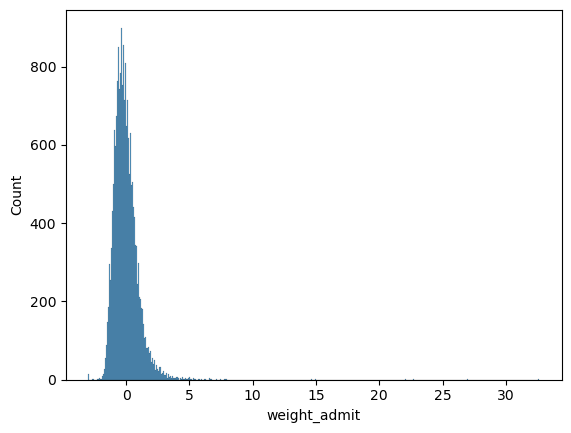

In [18]:
sns.histplot(static['weight_admit'])

<Axes: >

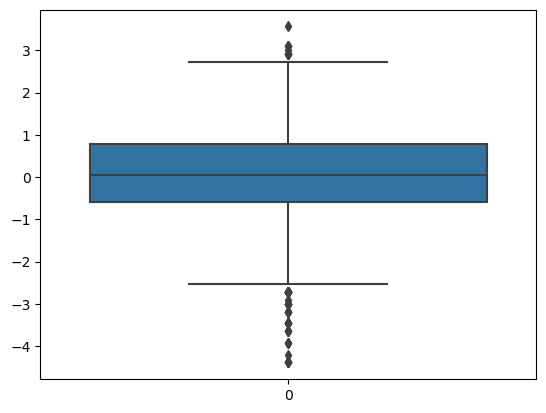

In [19]:
sns.boxplot(static['height'])

<Axes: xlabel='height', ylabel='Count'>

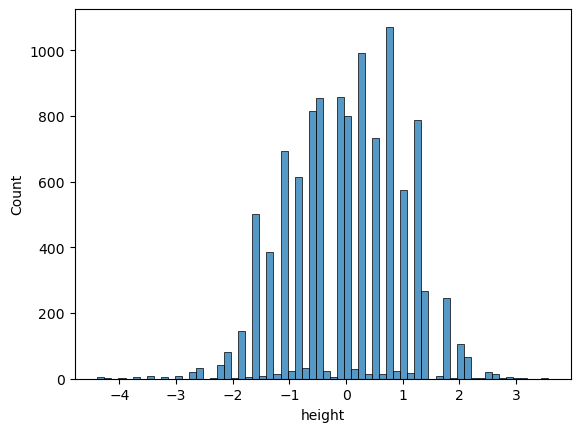

In [20]:
sns.histplot(static['height'])

In [21]:
#impute with median since weight skewed

s_trainset=s_trainset.fillna(s_trainset.median())

C:\Users\kawai\AppData\Local\Temp\ipykernel_22860\2449942311.py:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  s_trainset=s_trainset.fillna(s_trainset.median())
C:\Users\kawai\AppData\Local\Temp\ipykernel_22860\2449942311.py:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  s_trainset=s_trainset.fillna(s_trainset.median())


In [22]:
s_trainset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14289 entries, 0 to 20413
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   14289 non-null  object        
 1   hosp_admittime       14289 non-null  datetime64[ns]
 2   hosp_dischtime       14289 non-null  datetime64[ns]
 3   icu_intime           14289 non-null  datetime64[ns]
 4   icu_outtime          14289 non-null  datetime64[ns]
 5   los_icu              14289 non-null  float64       
 6   icu_death            14289 non-null  float64       
 7   gender               14289 non-null  float64       
 8   race                 14289 non-null  object        
 9   admission_age        14289 non-null  float64       
 10  weight_admit         14289 non-null  float64       
 11  height               14289 non-null  float64       
 12  admission_type       14289 non-null  object        
 13  first_careunit       14289 non-

In [27]:
# s_trainset.to_csv('s_trainset.csv', index=False)
# s_testset.to_csv('s_testset.csv', index=False)
# s_holdoutset.to_csv('s_holdoutset.csv', index=False)

NameError: name 's_trainset' is not defined

# Dynamic Data

In [22]:
dynamic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93604 entries, 0 to 93603
Data columns (total 70 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  93604 non-null  int64  
 1   charttime           93604 non-null  object 
 2   albumin             18650 non-null  float64
 3   globulin            519 non-null    float64
 4   total_protein       975 non-null    float64
 5   aniongap            87378 non-null  float64
 6   bicarbonate         87743 non-null  float64
 7   bun                 88397 non-null  float64
 8   calcium             78419 non-null  float64
 9   chloride            90093 non-null  float64
 10  creatinine          88774 non-null  float64
 11  glucose             85696 non-null  float64
 12  sodium              89998 non-null  float64
 13  potassium           91066 non-null  float64
 14  heart_rate          4259 non-null   float64
 15  sbp                 3381 non-null   float64
 16  dbp 

In [23]:
dynamic.describe()

,id,albumin,globulin,total_protein,aniongap,bicarbonate,bun,calcium,chloride,creatinine,...,sodium_bg,lactate_bg,glucose_bg,d_dimer,fibrinogen,thrombin,inr,pt,ptt,urineoutput
count,9.360400e+04,18650.000000,519.000000,975.000000,87378.000000,87743.000000,88397.000000,78419.000000,90093.000000,88774.000000,...,54.000000,280.000000,97.000000,67.000000,8004.000000,41.000000,49167.000000,49183.000000,47924.000000,2085.000000
mean,2.501494e+07,3.105984,2.536609,5.800205,15.401772,23.182264,34.678779,8.398924,102.135882,1.979689,...,135.500000,3.444643,150.443299,3782.014925,292.430422,38.236585,1.702182,18.492459,41.627425,96.200959
std,2.884758e+06,0.675897,0.889693,1.125384,4.674036,5.358520,25.854508,0.927455,7.209088,1.984926,...,4.859342,3.511615,49.528815,4422.235200,179.187872,45.724483,1.022717,10.689659,23.774197,189.312374
min,2.000130e+07,0.900000,0.700000,2.100000,-10.000000,2.000000,1.000000,1.600000,59.000000,0.100000,...,118.000000,0.600000,66.000000,223.000000,26.000000,10.000000,0.800000,8.200000,16.600000,0.000000
25%,2.249608e+07,2.600000,2.000000,5.200000,12.000000,20.000000,17.000000,7.900000,98.000000,0.900000,...,133.000000,1.400000,118.000000,1264.500000,161.000000,15.000000,1.200000,12.900000,28.500000,29.000000
50%,2.509921e+07,3.100000,2.400000,5.800000,15.000000,23.000000,27.000000,8.400000,102.000000,1.300000,...,136.000000,2.150000,149.000000,1919.000000,240.000000,17.600000,1.400000,14.900000,33.400000,50.000000
75%,2.748404e+07,3.600000,2.850000,6.400000,18.000000,26.000000,45.000000,8.900000,107.000000,2.300000,...,138.000000,4.100000,174.000000,4181.500000,377.000000,24.200000,1.800000,19.900000,44.300000,100.000000
max,2.999962e+07,5.900000,9.200000,15.700000,56.000000,50.000000,263.000000,29.500000,155.000000,80.000000,...,147.000000,28.000000,369.000000,18784.000000,1466.000000,150.000000,21.500000,150.000000,150.000000,6000.000000


In [24]:
dynamic['id'].nunique()

20414

In [25]:
#Convert datetime datatype. Convert id to object

# dynamic['charttime']=pd.to_datetime(dynamic['charttime'], format= '%m/%d/%y %H:%M')

dynamic['id'] = dynamic['id'].astype(str)

In [26]:
#drop columns with >50% missing data

drop_thresh50 = dynamic.shape[0]*0.5
dynamic = dynamic.dropna(thresh = drop_thresh50, axis=1)

In [27]:
# #normalise data

num_cols = dynamic.columns[dynamic.dtypes.apply(lambda c: np.issubdtype(c, np.number))]
# scaler = preprocessing.StandardScaler()
# dynamic[num_cols] = scaler.fit_transform(dynamic[num_cols])

In [14]:
dynamic.loc[dynamic['id'].values=='20036035']

,id,charttime,aniongap,bicarbonate,bun,calcium,chloride,creatinine,glucose,sodium,...,mch,mchc,mcv,platelet,rbc,rdw,wbc,inr,pt,ptt
52955,20036035,10/5/22 23:22,29.0,16.0,19.0,9.1,102.0,0.8,486.0,143.0,...,29.8,32.8,91.0,229.0,4.58,13.4,17.8,1.4,15.6,37.7
75611,20036035,10/6/22 3:36,31.0,13.0,18.0,9.1,104.0,1.0,386.0,144.0,...,29.7,32.7,91.0,206.0,4.54,13.5,18.8,1.3,14.4,36.0


In [28]:
#check
dynamic.describe()

,aniongap,bicarbonate,bun,calcium,chloride,creatinine,glucose,sodium,potassium,hematocrit,...,mch,mchc,mcv,platelet,rbc,rdw,wbc,inr,pt,ptt
count,87378.000000,87743.000000,88397.000000,78419.000000,90093.000000,88774.000000,85696.000000,89998.000000,91066.000000,74416.000000,...,71724.000000,71743.000000,71741.000000,72021.000000,71742.000000,71665.000000,71755.000000,49167.000000,49183.000000,47924.000000
mean,15.401772,23.182264,34.678779,8.398924,102.135882,1.979689,147.347076,137.520195,4.289321,30.660177,...,30.004028,32.659832,91.930623,198.507033,3.364871,16.125696,11.750896,1.702182,18.492459,41.627425
std,4.674036,5.358520,25.854508,0.927455,7.209088,1.984926,82.779826,5.777352,0.756544,6.288207,...,2.965106,1.779692,7.910015,126.040459,0.750931,2.657995,11.319116,1.022717,10.689659,23.774197
min,-10.000000,2.000000,1.000000,1.600000,59.000000,0.100000,8.000000,83.000000,1.200000,6.400000,...,16.200000,23.800000,53.000000,5.000000,0.590000,11.200000,0.100000,0.800000,8.200000,16.600000
25%,12.000000,20.000000,17.000000,7.900000,98.000000,0.900000,102.000000,135.000000,3.800000,26.000000,...,28.400000,31.500000,87.000000,113.000000,2.810000,14.200000,6.700000,1.200000,12.900000,28.500000
50%,15.000000,23.000000,27.000000,8.400000,102.000000,1.300000,127.000000,138.000000,4.200000,30.000000,...,30.100000,32.700000,92.000000,181.000000,3.290000,15.600000,9.900000,1.400000,14.900000,33.400000
75%,18.000000,26.000000,45.000000,8.900000,107.000000,2.300000,166.000000,141.000000,4.700000,34.700000,...,31.700000,33.800000,96.000000,256.000000,3.850000,17.500000,14.400000,1.800000,19.900000,44.300000
max,56.000000,50.000000,263.000000,29.500000,155.000000,80.000000,2970.000000,185.000000,13.000000,65.600000,...,48.700000,47.600000,138.000000,1592.000000,7.640000,37.200000,462.600000,21.500000,150.000000,150.000000


In [29]:
#dynamic train set with same patients in static train set
d_trainset= dynamic.loc[dynamic['id'].isin(trainID)]

#dynamic train set with same patients in static train set
d_testset= dynamic.loc[dynamic['id'].isin(testID)]

#dynamic train set with same patients in static train set
d_holdoutset= dynamic.loc[dynamic['id'].isin(holdoutID)]

In [30]:
#check
print(d_trainset['id'].nunique())
print(d_testset['id'].nunique())
print(d_holdoutset['id'].nunique())

14289
4083
2042


In [31]:
d_trainset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64985 entries, 0 to 93603
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           64985 non-null  object 
 1   charttime    64985 non-null  object 
 2   aniongap     60682 non-null  float64
 3   bicarbonate  60919 non-null  float64
 4   bun          61393 non-null  float64
 5   calcium      54483 non-null  float64
 6   chloride     62558 non-null  float64
 7   creatinine   61638 non-null  float64
 8   glucose      59573 non-null  float64
 9   sodium       62519 non-null  float64
 10  potassium    63234 non-null  float64
 11  hematocrit   51595 non-null  float64
 12  hemoglobin   49922 non-null  float64
 13  mch          49709 non-null  float64
 14  mchc         49723 non-null  float64
 15  mcv          49723 non-null  float64
 16  platelet     49929 non-null  float64
 17  rbc          49725 non-null  float64
 18  rdw          49670 non-null  float64
 19  wbc 

In [20]:
#impute with KNN

imputer = KNNImputer(n_neighbors=5)
imputer.fit(d_trainset[num_cols])
d_trainset[num_cols] = imputer.transform(d_trainset[num_cols])
d_testset[num_cols] = imputer.transform(d_testset[num_cols])
d_holdoutset[num_cols] = imputer.transform(d_holdoutset[num_cols])

C:\Users\kawai\AppData\Local\Temp\ipykernel_15692\189031870.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_trainset[num_cols] = imputer.transform(d_trainset[num_cols])
C:\Users\kawai\AppData\Local\Temp\ipykernel_15692\189031870.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_testset[num_cols] = imputer.transform(d_testset[num_cols])
C:\Users\kawai\AppData\Local\Temp\ipykernel_15692\189031870.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [33]:
#impute with median

imputer = SimpleImputer(strategy='median')
imputer.fit(d_trainset[num_cols])
d_trainset[num_cols] = imputer.transform(d_trainset[num_cols])
d_testset[num_cols] = imputer.transform(d_testset[num_cols])
d_holdoutset[num_cols] = imputer.transform(d_holdoutset[num_cols])

C:\Users\kawai\AppData\Local\Temp\ipykernel_15540\2046462230.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_trainset[num_cols] = imputer.transform(d_trainset[num_cols])
C:\Users\kawai\AppData\Local\Temp\ipykernel_15540\2046462230.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_testset[num_cols] = imputer.transform(d_testset[num_cols])
C:\Users\kawai\AppData\Local\Temp\ipykernel_15540\2046462230.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [34]:
d_trainset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64985 entries, 0 to 93603
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           64985 non-null  object 
 1   charttime    64985 non-null  object 
 2   aniongap     64985 non-null  float64
 3   bicarbonate  64985 non-null  float64
 4   bun          64985 non-null  float64
 5   calcium      64985 non-null  float64
 6   chloride     64985 non-null  float64
 7   creatinine   64985 non-null  float64
 8   glucose      64985 non-null  float64
 9   sodium       64985 non-null  float64
 10  potassium    64985 non-null  float64
 11  hematocrit   64985 non-null  float64
 12  hemoglobin   64985 non-null  float64
 13  mch          64985 non-null  float64
 14  mchc         64985 non-null  float64
 15  mcv          64985 non-null  float64
 16  platelet     64985 non-null  float64
 17  rbc          64985 non-null  float64
 18  rdw          64985 non-null  float64
 19  wbc 

In [35]:
d_testset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18781 entries, 20 to 93600
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           18781 non-null  object 
 1   charttime    18781 non-null  object 
 2   aniongap     18781 non-null  float64
 3   bicarbonate  18781 non-null  float64
 4   bun          18781 non-null  float64
 5   calcium      18781 non-null  float64
 6   chloride     18781 non-null  float64
 7   creatinine   18781 non-null  float64
 8   glucose      18781 non-null  float64
 9   sodium       18781 non-null  float64
 10  potassium    18781 non-null  float64
 11  hematocrit   18781 non-null  float64
 12  hemoglobin   18781 non-null  float64
 13  mch          18781 non-null  float64
 14  mchc         18781 non-null  float64
 15  mcv          18781 non-null  float64
 16  platelet     18781 non-null  float64
 17  rbc          18781 non-null  float64
 18  rdw          18781 non-null  float64
 19  wbc

In [36]:
d_holdoutset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9838 entries, 34 to 93601
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           9838 non-null   object 
 1   charttime    9838 non-null   object 
 2   aniongap     9838 non-null   float64
 3   bicarbonate  9838 non-null   float64
 4   bun          9838 non-null   float64
 5   calcium      9838 non-null   float64
 6   chloride     9838 non-null   float64
 7   creatinine   9838 non-null   float64
 8   glucose      9838 non-null   float64
 9   sodium       9838 non-null   float64
 10  potassium    9838 non-null   float64
 11  hematocrit   9838 non-null   float64
 12  hemoglobin   9838 non-null   float64
 13  mch          9838 non-null   float64
 14  mchc         9838 non-null   float64
 15  mcv          9838 non-null   float64
 16  platelet     9838 non-null   float64
 17  rbc          9838 non-null   float64
 18  rdw          9838 non-null   float64
 19  wbc 

In [37]:
d_trainset.to_csv('d_trainset_m2.csv', index=False)
d_testset.to_csv('d_testset_m2.csv', index=False)
d_holdoutset.to_csv('d_holdoutset_m2.csv', index=False)